In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/nutrients_csvfile.csv")
df.head()
print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)

(335, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB
None
          Food Measure Grams Calories Protein  Fat Sat.Fat Fiber Carbs  \
count      335     335   335      334     335  335     333   335   335   
unique     329      61   103      152      40   45      38    57    80   
top     Butter   1 cup   100      100       1    t       0     0     0   
freq         3     120    38       14      53  115     174   116    45   

           

In [5]:
# ============================================
# Data Cleaning Function
# ============================================

import numpy as np

# Define the columns you care about
numeric_cols = ['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']

# Function to clean numeric columns
def clean_numeric(df, cols):
    for col in cols:
        # Remove non-numeric characters (like 'g', 't', 'kcal', etc.)
        df[col] = df[col].astype(str).str.replace('[^0-9.\-]', '', regex=True)
        # Convert to numeric, coerce errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Apply cleaning
df = clean_numeric(df, numeric_cols)

# Drop rows with missing or invalid numeric values
df = df.dropna(subset=numeric_cols)

# Drop duplicates
df = df.drop_duplicates()

print("✅ Data cleaned successfully!")
df.info()


✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 332
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      171 non-null    object 
 1   Measure   171 non-null    object 
 2   Grams     171 non-null    int64  
 3   Calories  171 non-null    float64
 4   Protein   171 non-null    float64
 5   Fat       171 non-null    float64
 6   Sat.Fat   171 non-null    float64
 7   Fiber     171 non-null    float64
 8   Carbs     171 non-null    float64
 9   Category  171 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 14.7+ KB


<>:14: SyntaxWarning: invalid escape sequence '\-'
<>:14: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipython-input-3225545464.py:14: SyntaxWarning: invalid escape sequence '\-'
  df[col] = df[col].astype(str).str.replace('[^0-9.\-]', '', regex=True)


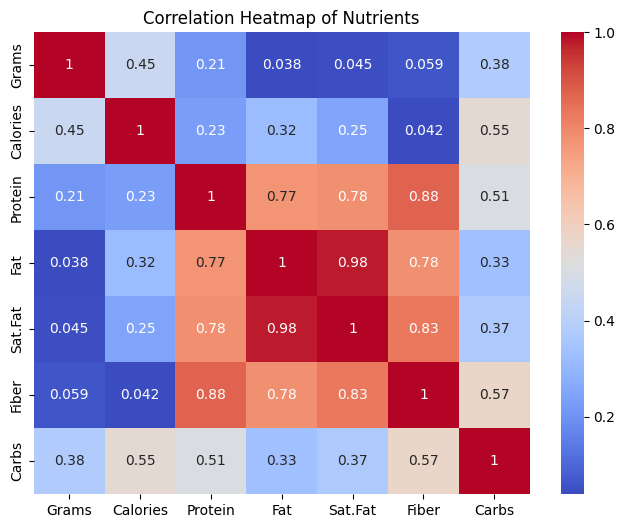

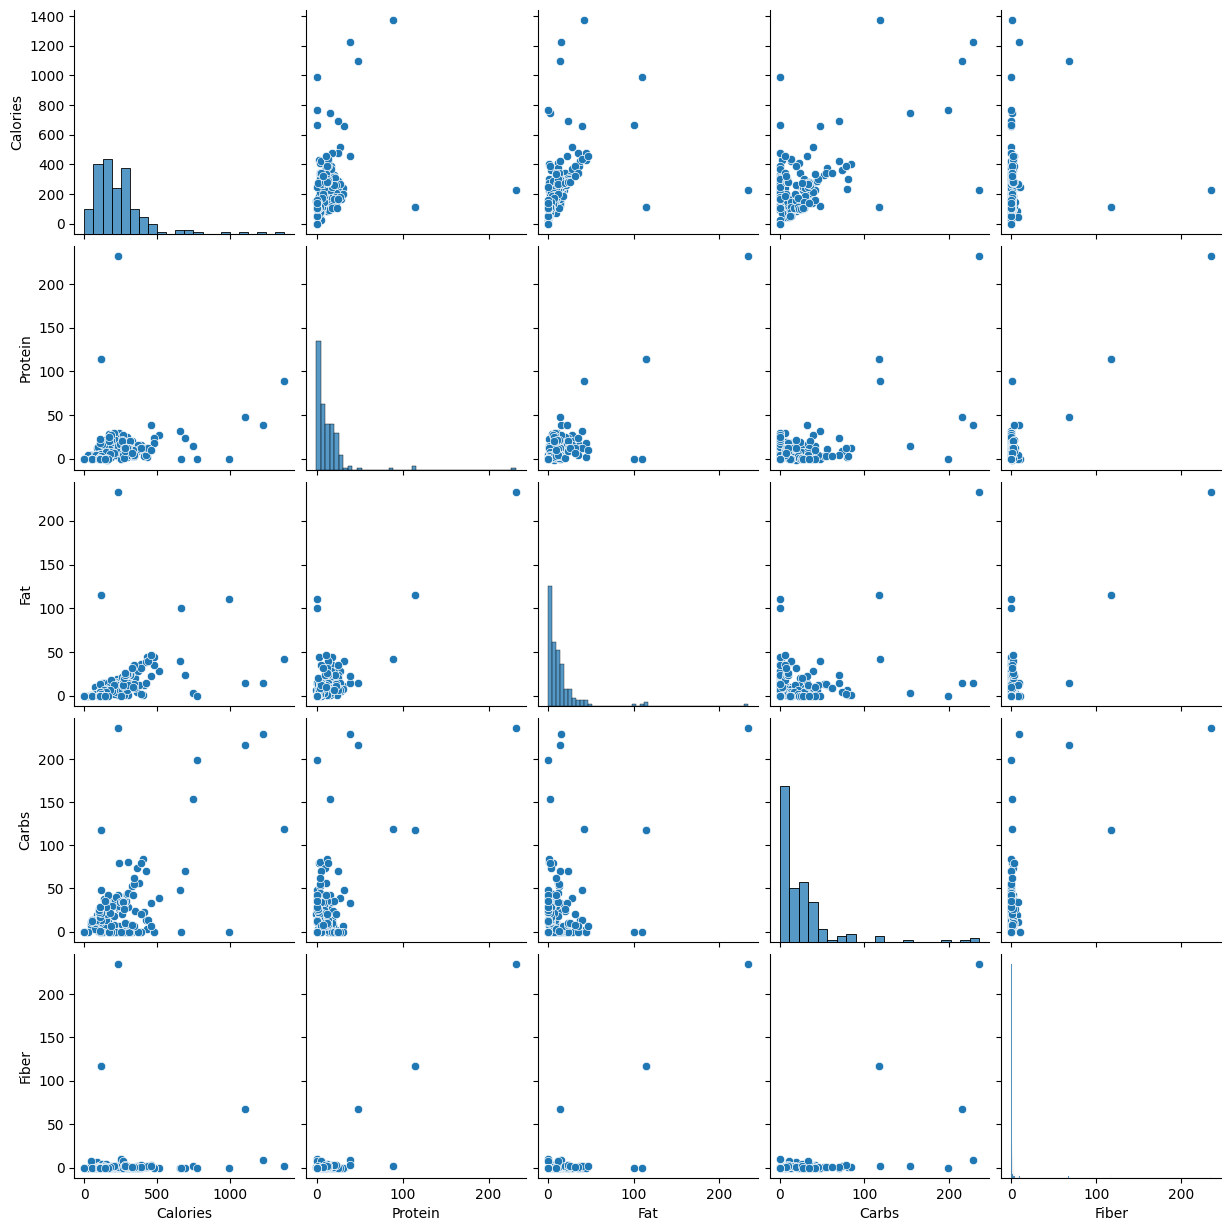

In [6]:
# ============================================
# Exploratory Data Analysis (EDA)
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Nutrients")
plt.show()

sns.pairplot(df[['Calories', 'Protein', 'Fat', 'Carbs', 'Fiber']])
plt.show()


In [7]:
# ============================================
# Prepare Features and Target
# ============================================
from sklearn.model_selection import train_test_split

X = df[['Grams', 'Calories', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']]
y = df['Protein']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split into training and testing sets.")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


✅ Data split into training and testing sets.
Training samples: 136
Testing samples: 35


✅ Linear Regression model trained!
Linear Regression Performance:
MAE: 8.67111117271953
MSE: 217.8295363143865
R²: 0.8726878461491997


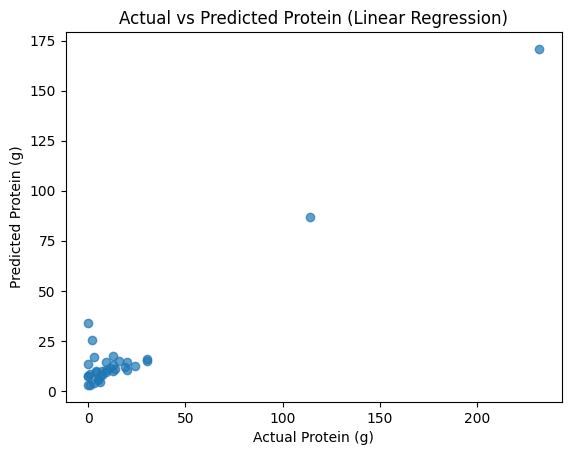

In [8]:
# ============================================
# Train and Evaluate Linear Regression Model
# ============================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("✅ Linear Regression model trained!")


print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual Protein (g)")
plt.ylabel("Predicted Protein (g)")
plt.title("Actual vs Predicted Protein (Linear Regression)")
plt.show()


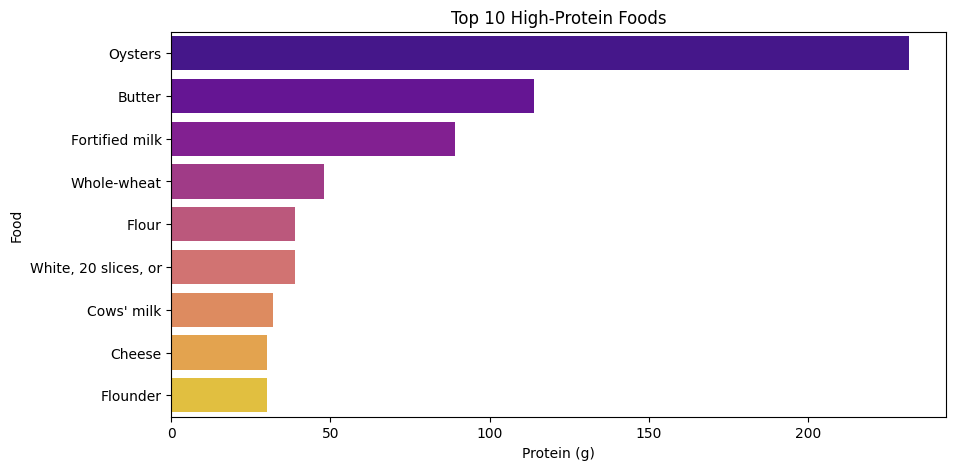

In [9]:
# ============================================
# Visualize Top High-Protein Foods
# ============================================
if 'Food' in df.columns:
    top_protein_foods = df[['Food', 'Protein']].sort_values(by='Protein', ascending=False).head(10)

    plt.figure(figsize=(10,5))
    sns.barplot(x='Protein', y='Food', data=top_protein_foods, hue='Food',palette='plasma',legend=False)
    plt.title("Top 10 High-Protein Foods")
    plt.xlabel("Protein (g)")
    plt.ylabel("Food")
    plt.show()
else:
    print("⚠️ No 'Food' column found for labeling top foods.")
